# `geopandas`

GeoPandas is a Python library that extends the pandas library by adding support for geospatial data. In this lesson we will introduce the geopandas library to work with vector data. We will also make our first map.

In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import the data we first used the OS package to create a reproducible file path:

In [3]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp


'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [4]:
pigs = gpd.read_file(fp)
pigs.head()


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [5]:
fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrame
The core data structure in GeoPandas is the geopandas.GeoDataFrame. We can think of it as a pandas.DataFrame with a dedicated geometry column that can perform spatial operations.

The geometry column in a geopandas.GeoDataFrame holds the geometry (point, polygon, etc.) of each spatial feature. This geometry column is of type geopandas.GeoSeries. Columns in the geopandas.GeoDataFrame with attributes about the features are pandas.Series like in a regular pandas.DataFrame.

In [6]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [7]:
# Check the data type of the pigs dataframe 
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [8]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [9]:
# Check geometry type of each element in a column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of the single feature in the California state boundary?

In [10]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS
Two other important attributes of a geopandas.GeoDataFrame are its coordinate reference system (CRS) and its extent.

**coordinate reference system (CRS)** as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a geopandas.GeoDataFrame using the crs attribute:



In [11]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


## Extent
The extent of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.



In [13]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [14]:
print('CRS: ', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS:  EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [15]:
pigs.crs == ca_boundary.crs

True

## Data wrangling
GeoPandas is conveniently built on top of pandas, so we may use everything we have learned about data selection, wrangling, and modification for a pandas.DataFrame to wrange geopandas.GeoDataFrames.


### Example
We only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [16]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [17]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check length of original dataframe
print('Total number of observations: ' , len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ' , len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


## Create a (preliminary) map
### `plot()`
A `geopandas.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the geopandas.GeoDataFrame will be used to create the axes of the plot.

## Example
Let’s take a quick look at our recent pigs data:

<Axes: >

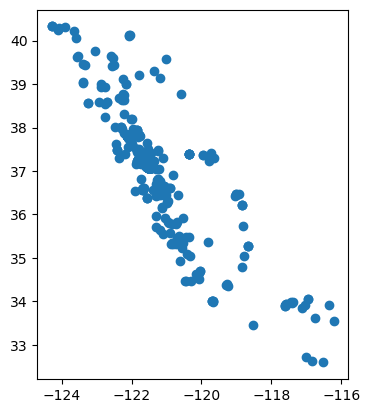

In [18]:
pigs_recent.plot()

In [22]:
## `matplotlib`’s `fig` and `ax`

We can interact with matplotlib via its pyplot interface, which we imported at the top of the notebook.

Matplotlib graphs the data in a figure which can have one or more axes. The axes is only the area specified by the 
 axis and 
 axis and what is plotted in it, while the figure can include multiple axes in it.

SyntaxError: invalid syntax (2900803532.py, line 3)

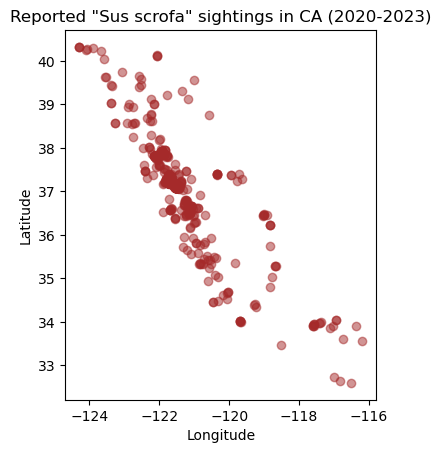

In [20]:

# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='brown'  # Update point color
                 )

# Update axis 

ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()


## Check-in
1. Add the California state boundary to the plot so the boundary appears behind the points as below. Don’t forget to customize your graph!

2. Write a short caption for your map describing the spatial distribution of observations. What patterns or clusters do you notice?

3. Discuss with a partner: what are some possible biases or limitations in GBIF species occurrence data (e.g., spatial coverage, sampling effort, data quality)?

Text(132.699971804565, 0.5, 'Latitude')

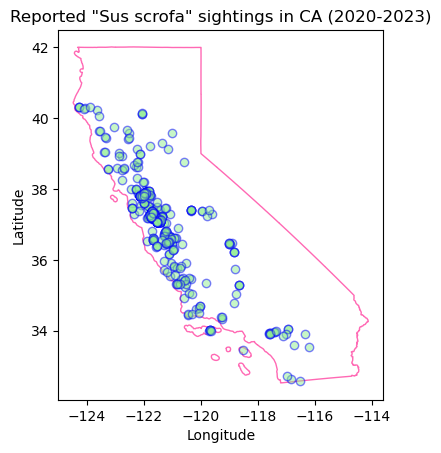

In [37]:
fig, ax = plt.subplots()

# Add data to axis
ca_boundary.plot(ax = ax,
                color = "none",
                edgecolor = "hotpink"
)

pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='lightgreen',  # Update point color
                 edgecolor = "blue"
                 )




# Update axis 



ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')